<a href="https://colab.research.google.com/github/pierreolivierbinet/Projet_Analyse_Spotify/blob/main/Analyse_Data_Spotify_POB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chargement des librairies

In [13]:
import pandas as pd
import numpy as np

# On charge le fichier CSV
df = pd.read_csv('/content/drive/MyDrive/dataset.csv')

# On affiche les dimensions de départ (Lignes, Colonnes)
print(f"Taille de départ : {df.shape}")

Taille de départ : (114000, 21)


# Gestion des doublons

In [14]:
# On supprime les doublons en se basant sur la colonne 'track_id'
# keep='first' signifie qu'on garde la première version trouvée et on jette les autres
df_clean = df.drop_duplicates(subset=['track_id'], keep='first').copy()

print(f"Taille après suppression des doublons : {df_clean.shape}")

Taille après suppression des doublons : (89741, 21)


# Gestion des valeurs manquantes

In [15]:
# On supprime toutes les lignes qui contiennent au moins une valeur manquante (NaN)
df_clean = df_clean.dropna()

# On vérifie qu'il n'y a plus de trous
print(f"Nombre de valeurs manquantes restantes : {df_clean.isnull().sum().sum()}")

Nombre de valeurs manquantes restantes : 0


# Traitement des données aberrantes

In [16]:
# On ne garde que les chansons qui durent plus de 10 000 ms (10 secondes)
# ET (&) dont le tempo est supérieur à 0
df_clean = df_clean[ (df_clean['duration_ms'] > 10000) & (df_clean['tempo'] > 0) ]

print(f"Taille après nettoyage des erreurs : {df_clean.shape}")

Taille après nettoyage des erreurs : (89583, 21)


# Création de nouvelles variables

In [17]:
# 1. Conversion de la durée en minutes
df_clean['duration_min'] = df_clean['duration_ms'] / 60000

# 2. Création de catégories de popularité
# On crée une fonction simple qui donne une étiquette selon le score
def definir_categorie(score):
    if score < 25:
        return 'Flop'      # Peu populaire
    elif score >= 75:
        return 'Hit'       # Très populaire
    else:
        return 'Moyen'     # Standard

# On applique cette fonction à toute la colonne 'popularity'
df_clean['popularity_category'] = df_clean['popularity'].apply(definir_categorie)

# On affiche un aperçu pour vérifier
print(df_clean[['track_name', 'duration_min', 'popularity', 'popularity_category']].head())

                   track_name  duration_min  popularity popularity_category
0                      Comedy      3.844433          73               Moyen
1            Ghost - Acoustic      2.493500          55               Moyen
2              To Begin Again      3.513767          57               Moyen
3  Can't Help Falling In Love      3.365550          71               Moyen
4                     Hold On      3.314217          82                 Hit


# Statistiques et corrélations

--- RÉSUMÉ DES VARIABLES CLÉS ---
         popularity  duration_min  danceability        energy         tempo
count  89583.000000  89583.000000  89583.000000  89583.000000  89583.000000
mean      33.191800      3.820747      0.563152      0.635355    122.272049
std       20.592792      1.862646      0.175271      0.255722     29.707011
min        0.000000      0.263333      0.051300      0.000020     30.200000
25%       19.000000      2.886000      0.450000      0.458000     99.515000
50%       33.000000      3.556433      0.576000      0.677000    122.021000
75%       49.000000      4.406000      0.692000      0.853000    140.087500
max      100.000000     87.288250      0.985000      1.000000    243.372000


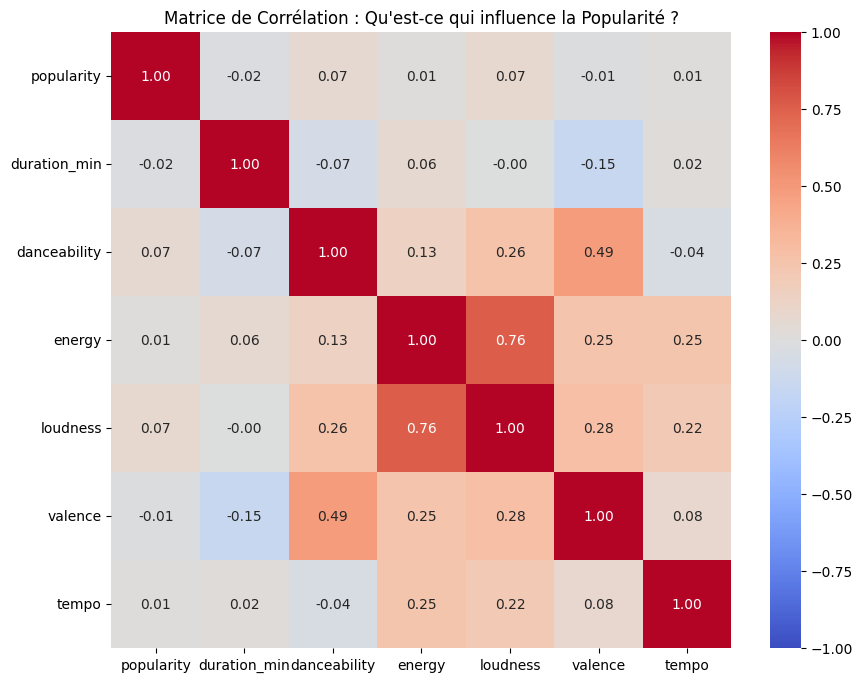

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. STATISTIQUES DESCRIPTIVES ---
print("--- RÉSUMÉ DES VARIABLES CLÉS ---")
# On se concentre sur les colonnes utiles pour ton sujet
cols_interessantes = ['popularity', 'duration_min', 'danceability', 'energy', 'tempo']
print(df_clean[cols_interessantes].describe())

# --- 2. CORRÉLATIONS (HEATMAP) ---
plt.figure(figsize=(10, 8))

# On calcule les liens entre toutes les variables techniques
matrice_corr = df_clean[['popularity', 'duration_min', 'danceability', 'energy', 'loudness', 'valence', 'tempo']].corr()

# On dessine la carte
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Matrice de Corrélation : Qu'est-ce qui influence la Popularité ?")
plt.show()

# Distribution & analyses croisées

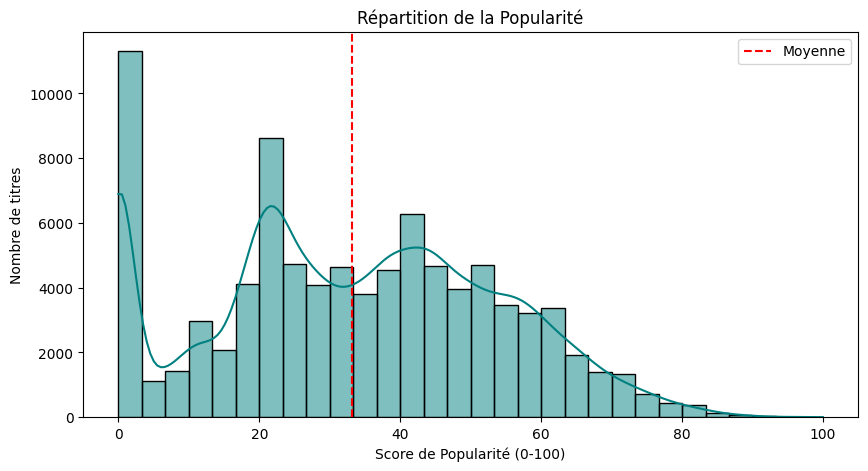

/tmp/ipython-input-519410878.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='popularity_category', y='danceability', data=df_clean,
/tmp/ipython-input-519410878.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='popularity_category', y='acousticness', data=df_clean,


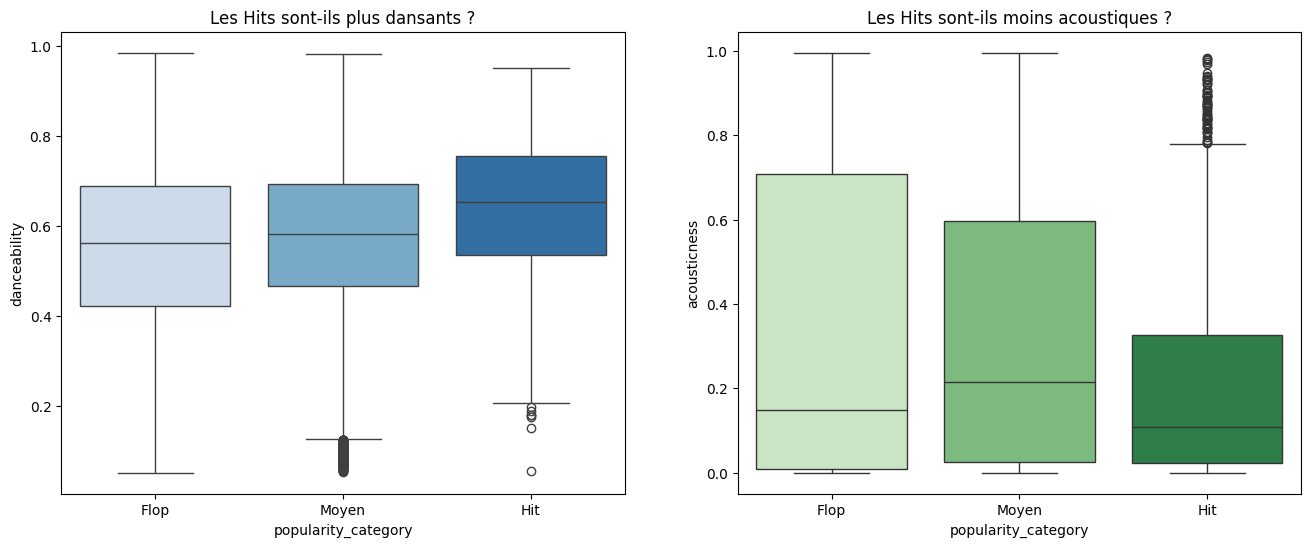

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- A. DISTRIBUTION DE LA POPULARITÉ (Histogramme) ---
# Objectif : Voir si la popularité suit une courbe normale (en cloche) ou non
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['popularity'], bins=30, kde=True, color='teal')
plt.title("Répartition de la Popularité")
plt.xlabel("Score de Popularité (0-100)")
plt.ylabel("Nombre de titres")
plt.axvline(x=df_clean['popularity'].mean(), color='red', linestyle='--', label='Moyenne')
plt.legend()
plt.show()

# --- B. ANALYSE CROISÉE (Boxplots) ---
# Objectif : Comparer les profils techniques des Hits vs Flops
# On crée une figure avec 2 graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1 : Danceability
sns.boxplot(ax=axes[0], x='popularity_category', y='danceability', data=df_clean,
            order=['Flop', 'Moyen', 'Hit'], palette="Blues")
axes[0].set_title("Les Hits sont-ils plus dansants ?")

# Graphique 2 : Acousticness
sns.boxplot(ax=axes[1], x='popularity_category', y='acousticness', data=df_clean,
            order=['Flop', 'Moyen', 'Hit'], palette="Greens")
axes[1].set_title("Les Hits sont-ils moins acoustiques ?")

plt.show()

# Clusters et analyse des genres

#

/tmp/ipython-input-458865859.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='popularity', data=df_clean, palette='viridis')


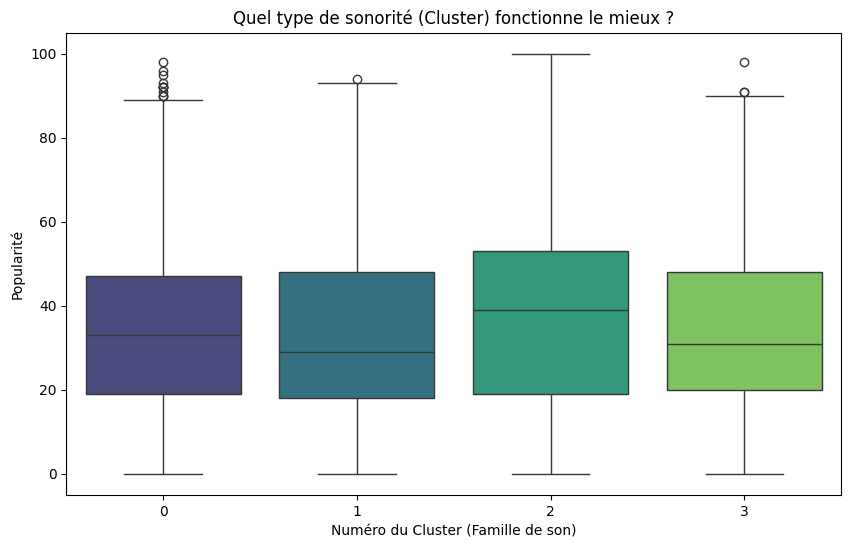

--- QUI SONT CES CLUSTERS ? (Moyennes) ---
           energy   valence  danceability  acousticness
cluster                                                
0        0.734277  0.769343      0.675698      0.266299
1        0.298804  0.317357      0.451869      0.797348
2        0.629614  0.358106      0.682456      0.189756
3        0.846821  0.321673      0.418921      0.059590


In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. On prépare les données (On prend les ingrédients de la recette audio)
features = ['energy', 'valence', 'danceability', 'acousticness']
X = df_clean[features]

# 2. On met tout à la même échelle (Standardisation)
# C'est important car l'énergie est entre 0 et 1, mais le tempo peut être à 150.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. L'IA crée 4 groupes (Clusters) automatiquement
kmeans = KMeans(n_clusters=4, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)

# 4. On visualise : Quel cluster est le plus populaire ?
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='popularity', data=df_clean, palette='viridis')
plt.title("Quel type de sonorité (Cluster) fonctionne le mieux ?")
plt.xlabel("Numéro du Cluster (Famille de son)")
plt.ylabel("Popularité")
plt.show()

# 5. Pour comprendre ce qu'il y a dans les clusters (IMPORTANT)
print("--- QUI SONT CES CLUSTERS ? (Moyennes) ---")
print(df_clean.groupby('cluster')[features].mean())

/tmp/ipython-input-1332546772.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')


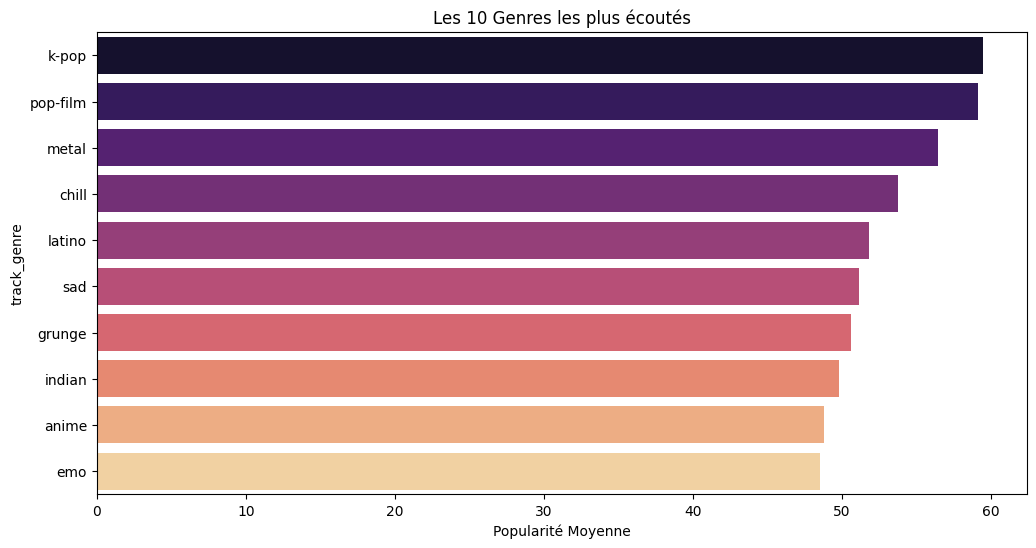

In [21]:
# On calcule la moyenne de popularité par genre et on prend les 10 meilleurs
top_genres = df_clean.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')
plt.title("Les 10 Genres les plus écoutés")
plt.xlabel("Popularité Moyenne")
plt.show()